# FINAL PROJECT DATA SCIENCE HARWIAN BRAMA (DS 32A+)

# FLOW PROJECT (CRISP DM FRAME WORK)

## BUSINESS UNDERSTANDING

### **Latar Belakang**
Perusahaan multinasional di sektor Fast-Moving Consumer Goods (FMCG) dan retail menghadapi tantangan dalam mengelola distribusi dan profitabilitas lintas wilayah. Di tengah persaingan ketat dan kompleksitas rantai pasok, kemampuan untuk memproyeksikan keuntungan secara cepat dan akurat menjadi kebutuhan strategis.

Produk dengan margin tinggi di satu wilayah belum tentu menguntungkan di wilayah lain—dipengaruhi oleh jenis produk, kanal distribusi (online/offline), prioritas pengiriman, dan waktu tempuh logistik. Oleh karena itu, perusahaan perlu sistem prediktif berbasis data untuk mendukung keputusan real-time dan alokasi sumber daya yang efisien.

Project ini menggambarkan transaksi penjualan global yang mencakup fitur penting seperti Region, Item Type, Sales Channel, Order Priority, Units Sold, dan Total Profit, serta mencerminkan struktur data nyata dari sistem industri.

### **Permasalahan Bisnis**

1. Tidak adanya sistem prediksi profit dari order baru
2. Kurangnya pemahaman data terhadap faktor utama penentu keuntungan
3. Alokasi produk dan strategi penjualan belum berbasis data
Akibatnya, peluang pasar bisa terlewat, efisiensi menurun, dan keputusan menjadi tidak presisi.

### **Tujuan Analisis**

1. Memprediksi total profit dari order berdasarkan kombinasi fitur transaksi
2. Mengidentifikasi variabel kunci yang berdampak pada profitabilitas
3. Menyediakan insight visual & rekomendasi strategis untuk optimalisasi
saluran, produk, dan wilayah

### **Target Analisa**

1. C-Level Management / Eksekutif (CEO, COO, CFO)
2. Sales & Marketing Director / Manager
3. Product Manager & Regional Sales Leader
4. Supply Chain & Operations Manager

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Set display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Import Data set

In [5]:
df=pd.read_csv('/content/drive/MyDrive/ASSIGMENT DIBIMBING/01 FINAL PROJECT/FINAL PROJECT DS (MACHINE LEARNING) /FINAL PROJECT DS_HARWIAN BRAMA/100000 Sales Records.csv')

In [6]:
# Info awal
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34


## DATA UNDERSTANDING

**Sumber Dataset:**

Data set ini berisi rekapan penjualan 100.000 item berdasarkan wilayah, negara, dan penjualan global untuk tahun 2010 hingga 2017. (https://www.kaggle.com/datasets/okhiriadaveoseghale/100000-sales-records?select=100000+Sales+Records.csv).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          100000 non-null  object 
 1   Country         100000 non-null  object 
 2   Item Type       100000 non-null  object 
 3   Sales Channel   100000 non-null  object 
 4   Order Priority  100000 non-null  object 
 5   Order Date      100000 non-null  object 
 6   Order ID        100000 non-null  int64  
 7   Ship Date       100000 non-null  object 
 8   Units Sold      100000 non-null  int64  
 9   Unit Price      100000 non-null  float64
 10  Unit Cost       100000 non-null  float64
 11  Total Revenue   100000 non-null  float64
 12  Total Cost      100000 non-null  float64
 13  Total Profit    100000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 10.7+ MB


Ubah data yang belum sesuai (Order Date dan Ship Date) menjadi datatime

#### Feature Engineering

##### Konversi Kolom Tanggal

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

##### Ekstrak Bulan dari Order Date

In [9]:
df['Order Month'] = df['Order Date'].dt.to_period('M').astype(str)

Membuat kolom baru berisi informasi bulan dan tahun dari tanggal order dalam format '2015-01'.

### Data Dictionary

| Nama Kolom       | Tipe Data  | Deskripsi                                                               |
| ---------------- | ---------- | ----------------------------------------------------------------------- |
| `Region`         | object     | Wilayah penjualan (contoh: Asia, Europe, Sub-Saharan Africa)            |
| `Country`        | object     | Negara tempat transaksi dilakukan                                       |
| `Item Type`      | object     | Jenis barang yang dijual (contoh: Fruits, Beverages, Office Supplies)   |
| `Sales Channel`  | object     | Saluran penjualan (Online / Offline)                                    |
| `Order Priority` | object     | Prioritas pesanan (contoh: L = Low, M = Medium, H = High, C = Critical) |
| `Order Date`     | datetime64 | Tanggal pemesanan barang                                                |
| `Order ID`       | int64      | ID unik untuk setiap pesanan                                            |
| `Ship Date`      | datetime64 | Tanggal barang dikirim                                                  |
| `Units Sold`     | int64      | Jumlah unit barang yang terjual                                         |
| `Unit Price`     | float64    | Harga jual per unit barang                                              |
| `Unit Cost`      | float64    | Biaya per unit barang                                                   |
| `Total Revenue`  | float64    | Pendapatan total dari penjualan                                         |
| `Total Cost`     | float64    | Biaya total dari penjualan                                              |
| `Total Profit`   | float64    | Keuntungan total = Total Revenue - Total Cost                           |


## DATA PREPARATION

#### Check Missing Value

In [10]:
# Cek missing dan duplikat
df.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


Tidak ada Missing Value

#### Check Duplicate

In [11]:
df.duplicated().sum()

np.int64(0)

Tidak ada Duplicate, Sehingga dapat dilanjutkan ke step selanjutnya

### Statistik deskriptif & Data Transformation

In [12]:
df.describe()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100000,100000.00,100000,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,2013-10-15 06:03:35.136000256,550395554.18,2013-11-09 06:55:19.488000,5001.45,266.70,188.02,1336066.73,941975.49,394091.24
min,2010-01-01 00:00:00,100008904.00,2010-01-02 00:00:00,1.00,9.33,6.92,18.66,13.84,4.82
25%,2011-11-25 00:00:00,326046383.25,2011-12-21 00:00:00,2505.00,109.28,56.67,279753.34,162928.29,95900.00
50%,2013-10-15 00:00:00,547718512.50,2013-11-09 00:00:00,5007.00,205.70,117.11,789891.57,467937.41,283657.46
75%,2015-09-07 00:00:00,775078534.50,2015-10-02 00:00:00,7495.25,437.20,364.69,1836489.60,1209474.69,568384.13
max,2017-07-28 00:00:00,999996459.00,2017-09-16 00:00:00,10000.00,668.27,524.96,6682700.00,5249075.04,1738700.00
std,NaN,259321871.37,NaN,2884.58,216.94,175.71,1471767.59,1151828.43,379598.60


## EXPLORATORY DATA ANALYSIS

#### Distribusi data

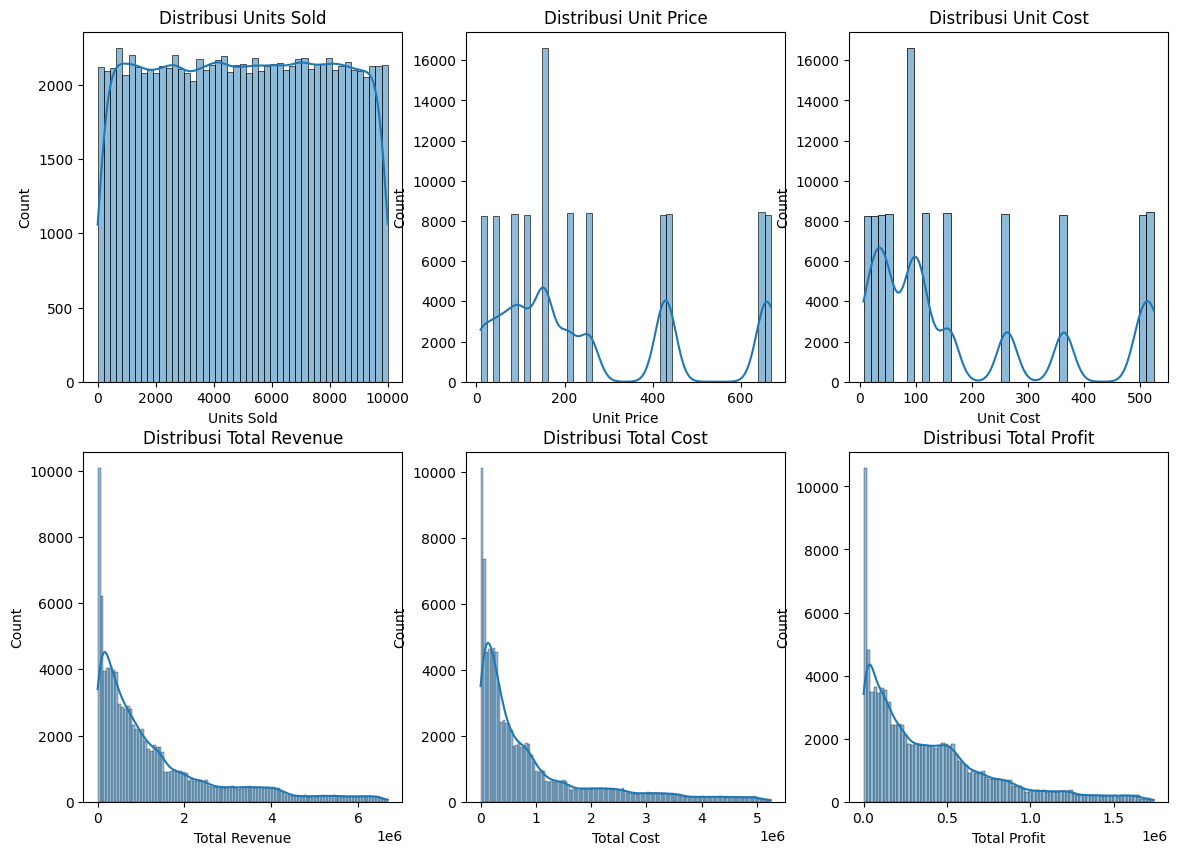

In [13]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 3, 1)
sns.histplot(df['Units Sold'], kde=True)
plt.title('Distribusi Units Sold')

plt.subplot(2, 3, 2)
sns.histplot(df['Unit Price'], kde=True)
plt.title('Distribusi Unit Price')

plt.subplot(2, 3, 3)
sns.histplot(df['Unit Cost'], kde=True)
plt.title('Distribusi Unit Cost')

plt.subplot(2, 3, 4)
sns.histplot(df['Total Revenue'], kde=True)
plt.title('Distribusi Total Revenue')

plt.subplot(2, 3, 5)
sns.histplot(df['Total Cost'], kde=True)
plt.title('Distribusi Total Cost')

plt.subplot(2, 3, 6)
sns.histplot(df['Total Profit'], kde=True)
plt.title('Distribusi Total Profit')
plt.show()

Hal yang didapat:
- Total revenue, Total Cost dan Total Profit memiliki distribusi skew kanan (menunjukkan kebanyakan transaksi kecil dibawah satu juta dan sebagian besar biaya produksi rendah serta banyak transaksi menghasilkan profit yang kecil)
- Distribusi Unit Sold menunjukkan distribusi yang merata (uniform) (dari 1 hingga 10.000)

| Point           | Insight Distribudsi data                                                                                                                         |
| -------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| Harga & Biaya  | Produk dijual dengan harga dan biaya tetap per kategori. Ini menunjukkan struktur harga yang dapat diprediksi dan cocok untuk analisis margin. |
| Penjualan      | Volume penjualan seragam → strategi distribusi cukup rata.                                                                                     |
| Revenue & Cost | Transaksi kecil lebih dominan → evaluasi apakah strategi "high-volume low-margin" masih menguntungkan.                                         |
| Profit         | Sebagian besar transaksi profitnya kecil → fokus pada **identifikasi pola profit besar** (produk, wilayah, channel).                           |


#### Bagaimana Total Profit per item type?

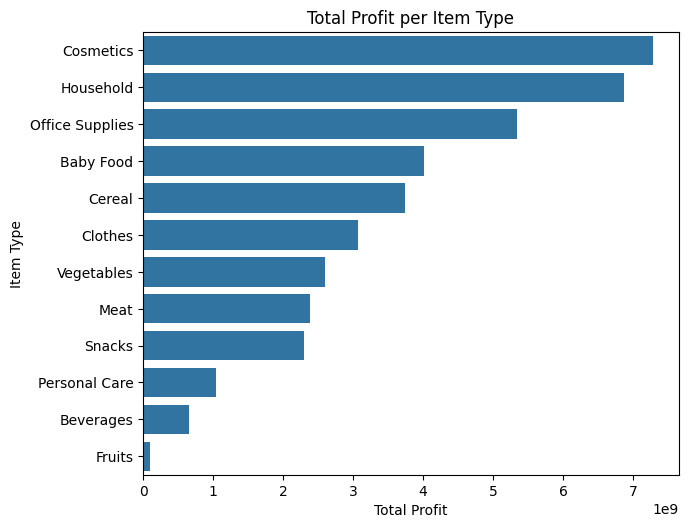

In [14]:
# 1. Total Profit per Item Type
plt.figure(figsize=(18, 30))

# Urutkan data berdasarkan Total Profit (ascending)
profit_by_item = df.groupby("Item Type")["Total Profit"].sum().sort_values(ascending=False).reset_index()

plt.subplot(6, 3, 1)
sns.barplot(data=profit_by_item, x="Total Profit", y="Item Type")
plt.title("Total Profit per Item Type")
plt.tight_layout()
plt.show()


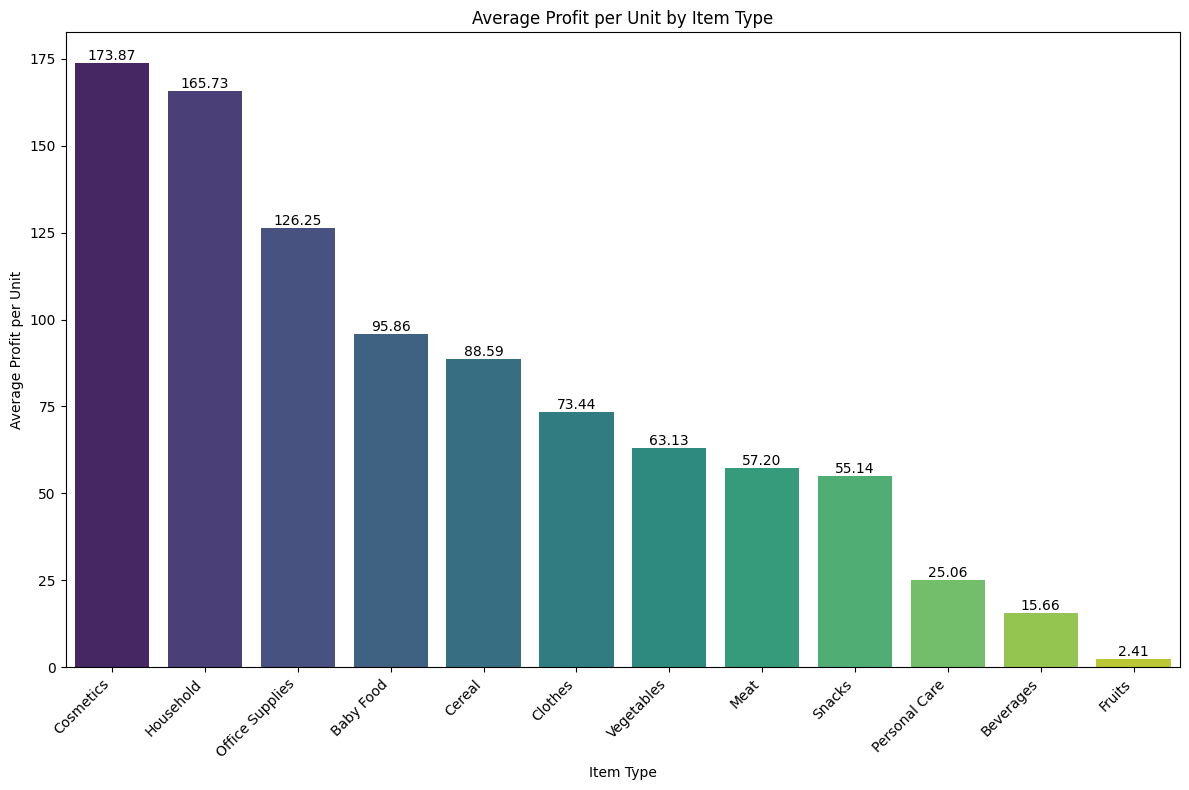

In [15]:
# Calculate Profit per Unit
df['Profit per Unit'] = df['Total Profit'] / df['Units Sold']

# Group by Item Type and calculate total units sold and average profit per unit
item_profit_summary = df.groupby('Item Type').agg(
    Total_Units_Sold=('Units Sold', 'sum'),
    Average_Profit_per_Unit=('Profit per Unit', 'mean')
)

# Sort by Average Profit per Unit (ascending)
item_profit_summary = item_profit_summary.sort_values(by='Average_Profit_per_Unit', ascending=False)

# Visualize Average Profit per Unit sorted ascending
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=item_profit_summary, x=item_profit_summary.index, y="Average_Profit_per_Unit", palette='viridis')
plt.title("Average Profit per Unit by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Average Profit per Unit")
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


#### Bagaimana Distribusi Total profit per region?

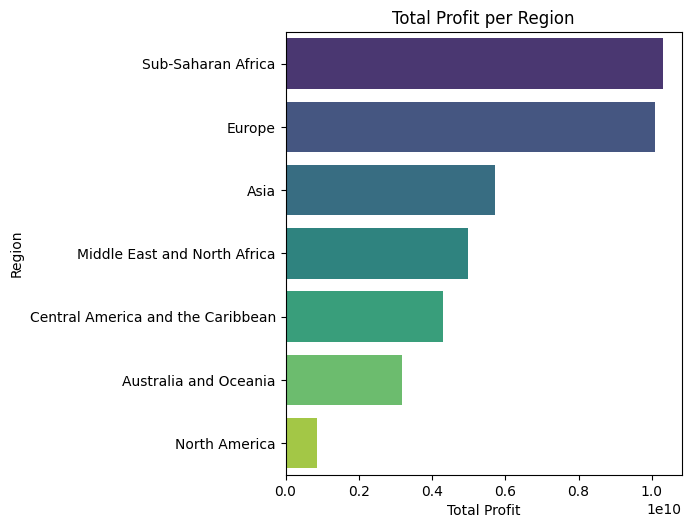

In [16]:
# Total Profit per Region
region_profit = df.groupby("Region")["Total Profit"].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(18, 30))
plt.subplot(6, 3, 3)
sns.barplot(data=region_profit, x="Total Profit", y="Region", palette="viridis")
plt.title("Total Profit per Region")
plt.tight_layout()
plt.show()


#### Bagaimana perbandingan penjualan online dan offline?

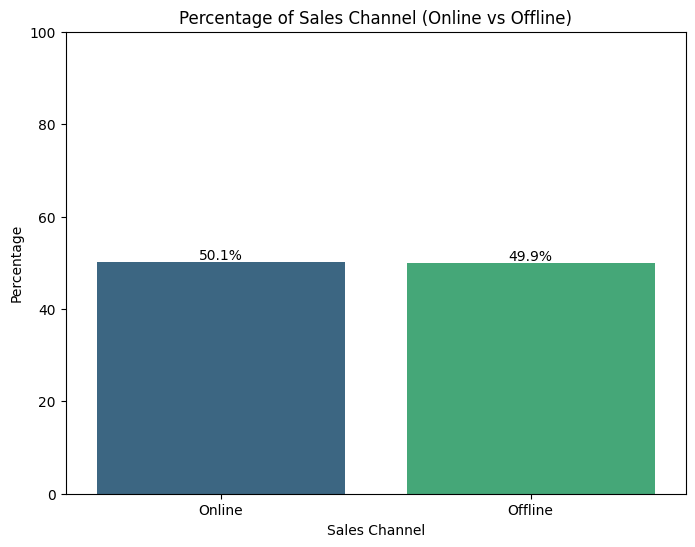

In [17]:
# Calculate the count of each sales
sales_channel_counts = df['Sales Channel'].value_counts()

# Calculate the percentage of each sales
sales_channel_percentages = sales_channel_counts / sales_channel_counts.sum() * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sales_channel_percentages.index, y=sales_channel_percentages.values, palette='viridis')

# Add percentages on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Percentage of Sales Channel (Online vs Offline)')
plt.xlabel('Sales Channel')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()

#### Bagaimana perbandingan profit Online dan offline?

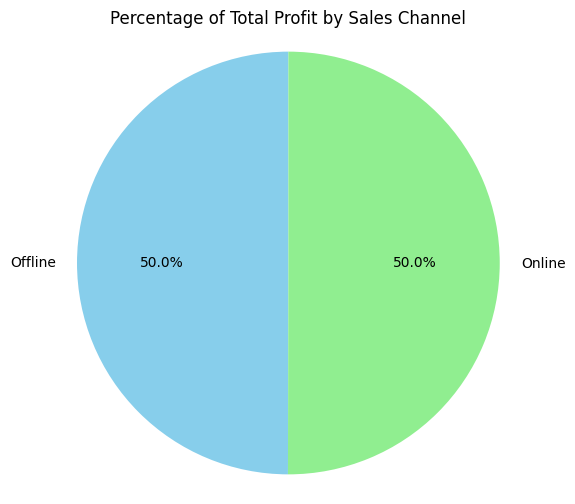

In [18]:
# Calculate total profit for each sales channel
profit_by_channel = df.groupby('Sales Channel')['Total Profit'].sum()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(profit_by_channel, labels=profit_by_channel.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Percentage of Total Profit by Sales Channel')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

####  Berapa rata - rata profit setiap tahunnya?

Rata-rata Profit per Tahun:


,Total Profit
Order Year,
2010,397426.20
2011,391841.32
2012,391689.69
2013,393710.29
2014,395346.30
2015,396582.87
2016,391673.01
2017,394809.24


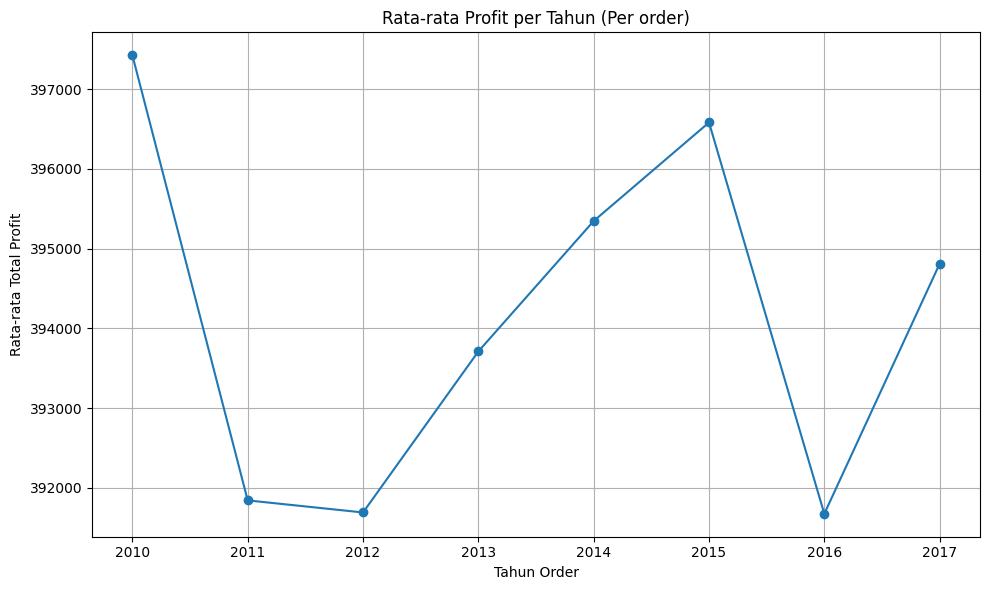

In [19]:
df['Order Year'] = df['Order Date'].dt.year

# Group by year and calculate the mean of 'Total Profit'
average_profit_per_year = df.groupby('Order Year')['Total Profit'].mean()

# Display the result
print("Rata-rata Profit per Tahun:")
display(average_profit_per_year)

plt.figure(figsize=(10, 6))
average_profit_per_year.plot(kind='line', marker='o')
plt.title('Rata-rata Profit per Tahun (Per order)')
plt.xlabel('Tahun Order')
plt.ylabel('Rata-rata Total Profit')
plt.grid(True)
plt.xticks(average_profit_per_year.index)
plt.tight_layout()
plt.show()

#### Berapa rata rata Cost setiap tahunnya?

Rata-rata Biaya (Cost) per Tahun:


,Total Cost
Order Year,
2010,943176.90
2011,933015.62
2012,943033.07
2013,939305.80
2014,957473.16
2015,953340.06
2016,932164.75
2017,928665.12


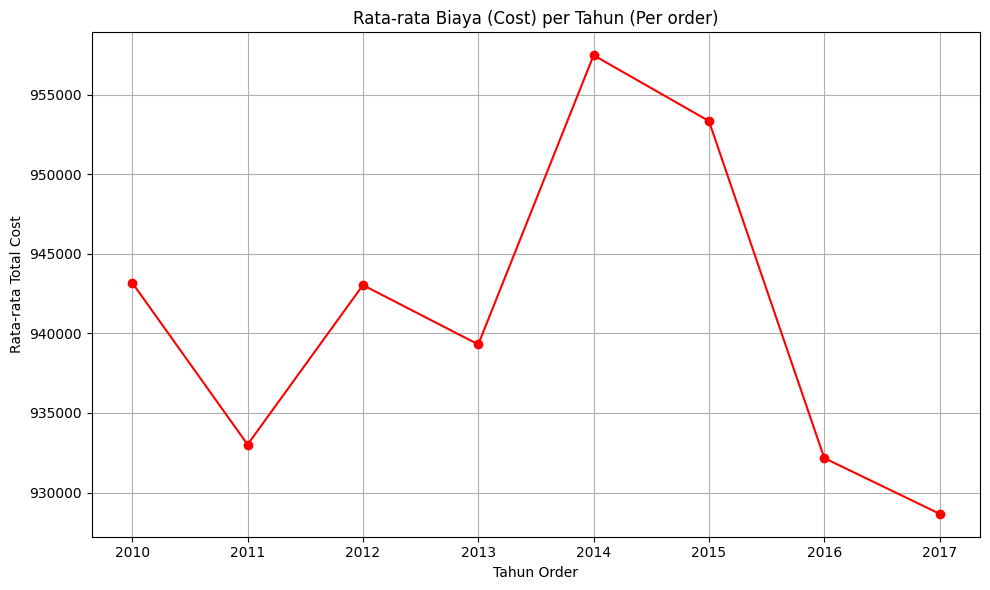

In [20]:
df_original = pd.read_csv('/content/drive/MyDrive/ASSIGMENT DIBIMBING/01 FINAL PROJECT/FINAL PROJECT DS (MACHINE LEARNING) /FINAL PROJECT DS_HARWIAN BRAMA/100000 Sales Records.csv')
df_original['Order Date'] = pd.to_datetime(df_original['Order Date'])
df_original['Order Year'] = df_original['Order Date'].dt.year


average_cost_per_year = df_original.groupby('Order Year')['Total Cost'].mean()

print("Rata-rata Biaya (Cost) per Tahun:")
display(average_cost_per_year)


plt.figure(figsize=(10, 6))
average_cost_per_year.plot(kind='line', marker='o', color='red')
plt.title('Rata-rata Biaya (Cost) per Tahun (Per order)')
plt.xlabel('Tahun Order')
plt.ylabel('Rata-rata Total Cost')
plt.grid(True)
plt.xticks(average_cost_per_year.index)
plt.tight_layout()
plt.show()

#### Berapa rata rata revenue setiap tahunnya?

Rata-rata Pendapatan (Revenue) per Tahun:


,Total Revenue
Order Year,
2010,1340603.10
2011,1324856.94
2012,1334722.76
2013,1333016.09
2014,1352819.46
2015,1349922.93
2016,1323837.76
2017,1323474.36


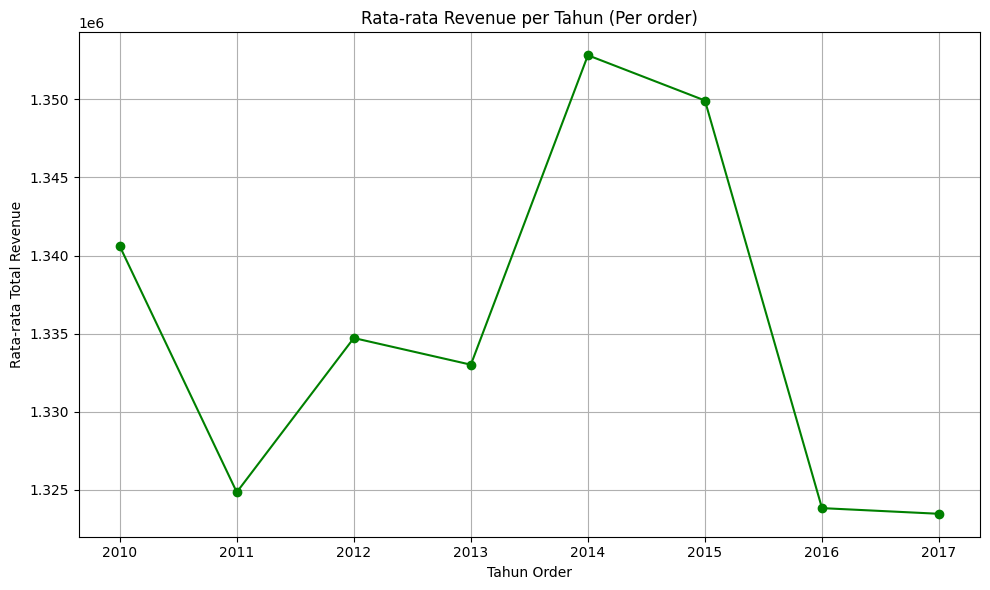

In [21]:
df['Order Year'] = df['Order Date'].dt.year

# Group by year and calculate the mean of 'Total Revenue'
average_revenue_per_year = df.groupby('Order Year')['Total Revenue'].mean()

# Display the result
print("Rata-rata Pendapatan (Revenue) per Tahun:")
display(average_revenue_per_year)

# Visualize the average revenue per year
plt.figure(figsize=(10, 6))
average_revenue_per_year.plot(kind='line', marker='o', color='green')
plt.title('Rata-rata Revenue per Tahun (Per order)')
plt.xlabel('Tahun Order')
plt.ylabel('Rata-rata Total Revenue')
plt.grid(True)
plt.xticks(average_revenue_per_year.index)
plt.tight_layout()
plt.show()

#### Korelasi Antar Fitur Numerik

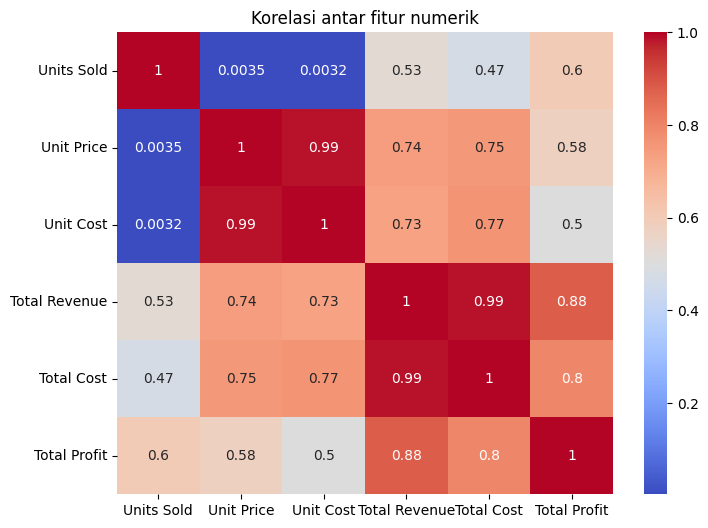

In [22]:
# Korelasi antar fitur numerik
num_cols = ['Units Sold','Unit Price','Unit Cost','Total Revenue','Total Cost','Total Profit']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur numerik")
plt.show()

Total Revenue dan Total Cost sangat redundan, karena mereka adalah hasil kalkulasi dari :


==> Total Revenue = Units Sold × Unit Price


==> Total Cost    = Units Sold × Unit Cost


- Sehingga fitur ini sudah mengandung informasi yang secara langsung menentukan Total Profit (target).

- Menyimpan fitur ini membuat model overfit karena belajar dari fitur yang sudah "tahu" jawaban.

In [23]:
df = df.drop(columns=['Total Revenue', 'Total Cost', 'Order ID', 'Country'])

In [24]:
print("\nShape setelah drop:", df.shape)
print("Kolom saat ini:", df.columns.tolist())


Shape setelah drop: (100000, 13)
Kolom saat ini: ['Region', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Profit', 'Order Month', 'Profit per Unit', 'Order Year']


## DATA PREPROCESSING

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Target
y = df['Total Profit']
X = df.drop(columns=['Total Profit'])

X = semua fitur kecuali target.


y = target yang diprediksi (Total Profit).

In [27]:
# Kolom kategori *Akan di encode
categorical_cols = ['Region', 'Item Type', 'Sales Channel', 'Order Priority']

# Kolom numerik *akan di scalling
numeric_cols = ['Units Sold', 'Unit Price', 'Unit Cost']


# (OHE + Scaling) menggunakan ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', MinMaxScaler(), numeric_cols)
])

*Kenapa Menggunakan OHE dan min max?

### Split Data Set

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
print("\nTrain shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (80000, 12)
Test shape : (20000, 12)


Maka X = semua kolom kecuali Total Profit ==> 13 - 1 = 12.

## MODELLING

- Base line Model : Liner Regression

Model Lain:
- Random Forest dan XGBost

In [30]:
# Function evaluasi
def evaluate_model(name, model, X_test, y_test, results):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2,
        "MAPE": mape
    })

### Model Default

In [31]:
# Model Default
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=10, max_depth=5, random_state=42, verbosity=0),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=10, max_depth=5, random_state=42)
}
results = []
for name, model in models.items():
    print(f"Training {name}...")
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Evaluate model

    evaluate_model(name, pipeline, X_test, y_test, results)  # Evaluate model

# Display results
results_df = pd.DataFrame(results)
display(results_df.style.format({'MAPE': '{:.2f}%'}))

Training Linear Regression...
Training Random Forest...
Training XGBoost...
Training Gradient Boosting...


,Model,MAE,RMSE,R2,MAPE
0,Linear Regression,107449.328998,151201.624865,0.839199,1574.96%
1,Random Forest,42889.190208,60432.552426,0.974313,58.34%
2,XGBoost,14571.700526,18882.893909,0.997492,70.33%
3,Gradient Boosting,111679.294682,138801.072208,0.864493,755.53%


### Linear Regression

In [32]:
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', LinearRegression())
# ])

# # Train model
# pipeline.fit(X_train, y_train)

In [33]:
# Prediksi (TRAIN &TEST)
# Recalculating predictions after pipeline redefinition
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

Untuk mengecek apakah overfitting / underfitting

In [34]:
# Evaluasi Metriks

# Evaluasi untuk TRAIN
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train))* 100

# Evaluasi untuk TEST
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Tampilkan hasil
print("\n=== Evaluasi Model Linear Regressioon ===")
print(f"TRAIN -> MAE: {mae_train:,.2f}, RMSE: {rmse_train:,.2f}, R²: {r2_train:.4f}, MAPE: {mape_train:.2f}%")
print(f"TEST  -> MAE: {mae_test:,.2f}, RMSE: {rmse_test:,.2f}, R²: {r2_test:.4f}, MAPE: {mape_test:.2f}%")



=== Evaluasi Model Linear Regressioon ===
TRAIN -> MAE: 112,359.06, RMSE: 140,156.16, R²: 0.8641, MAPE: 611.05%
TEST  -> MAE: 111,679.29, RMSE: 138,801.07, R²: 0.8645, MAPE: 755.53%


In [35]:
#Tunning with Best Alpa

from sklearn.linear_model import RidgeCV,LassoCV

# Buat model Ridge dengan cross-validation otomatis
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5))
])

# Latih model
ridge_pipeline.fit(X_train, y_train)

# Evaluasi dan simpan hasil
evaluate_model("Ridge Regression (Tuned)", ridge_pipeline, X_test, y_test, results)

# Cek alpha terbaik yang dipilih
print("Best alpha:", ridge_pipeline.named_steps['model'].alpha_)

# Lasso Regression with CV
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5, max_iter=10000))
])
lasso_pipeline.fit(X_train, y_train)
evaluate_model("LassoCV (Tuned)", lasso_pipeline, X_test, y_test, results)
print("Best alpha for Lasso:", lasso_pipeline.named_steps['model'].alpha_)




Best alpha: 1.0
Best alpha for Lasso: 10.0


In [36]:
from sklearn.linear_model import Ridge, Lasso

results = [] # Initialize results list

# === Final Ridge Model ===
ridge_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0, random_state=42))
])
ridge_final.fit(X_train, y_train)
evaluate_model("Ridge Final (alpha=1.0)", ridge_final, X_test, y_test, results)

# === Final Lasso Model ===
lasso_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=10.0, random_state=42, max_iter=10000))
])
lasso_final.fit(X_train, y_train)
evaluate_model("Lasso Final (alpha=10.0)", lasso_final, X_test, y_test, results)

Dikatakan baik jika MAPE dibawah 10% dan R2 dibawah 1


Insight:
- Perbedaan Train dan Test pada R2 Score sangat kecil (0.002) → model stabil dan tidak overfitting.
- MAE (Mean Absolute Error): Train: 107,108, | Test: 107,449 ==> rata-rata kesalahan prediksi profit adalah sekitar 107 ribu
- RMSE (Root Mean Squared Error): Train: 151,507 | Test: 151,202 ==> RMSE lebih besar dari MAE, yang wajar karena RMSE memberi penalti lebih pada outlier, Sehingga tidak ada indikasi error yang jauh melonjak pada tesr (Model menggerelaize dengan cukup baik)

In [37]:
# Ambil data tahun 2017 sebagai dasar
data_2017 = df[df['Order Year'] == 2017].copy()

# Buat data untuk 2018 dengan asumsi pola sama
data_2018 = data_2017.copy()
data_2018['Order Year'] = 2018  # ubah tahun

# (Opsional) simulasi kenaikan harga dan cost (misal harga naik 5%, cost naik 3%)
data_2018['Unit Price'] *= 1.05
data_2018['Unit Cost'] *= 1.03

# Hitung ulang Profit per Unit
data_2018['Profit per Unit'] = data_2018['Unit Price'] - data_2018['Unit Cost']

# Drop kolom target agar sesuai input model
X_2018 = data_2018.drop(columns=['Total Profit'])

# Prediksi Profit
predicted_profit_2018 = pipeline.predict(X_2018)

# Tambahkan hasil ke data
data_2018['Predicted Profit'] = predicted_profit_2018

# Hitung total dan rata-rata
total_profit_2018 = predicted_profit_2018.sum()
avg_profit_2018 = predicted_profit_2018.mean()

print("\n=== Prediksi Profit Tahun 2018 (Simulasi) ===")
print(f"Jumlah Order (simulasi): {len(data_2018)}")
print(f"Total Predicted Profit : {total_profit_2018:,.2f}")
print(f"Rata-rata Profit per Order : {avg_profit_2018:,.2f}")


=== Prediksi Profit Tahun 2018 (Simulasi) ===
Jumlah Order (simulasi): 7558
Total Predicted Profit : 3,135,250,440.83
Rata-rata Profit per Order : 414,825.41


*Memberikan simulasi bahwa Unit Price ada kenaikan 5% dan Cost kenaikan 3 % untuk estimasi prediksi tahun 2018

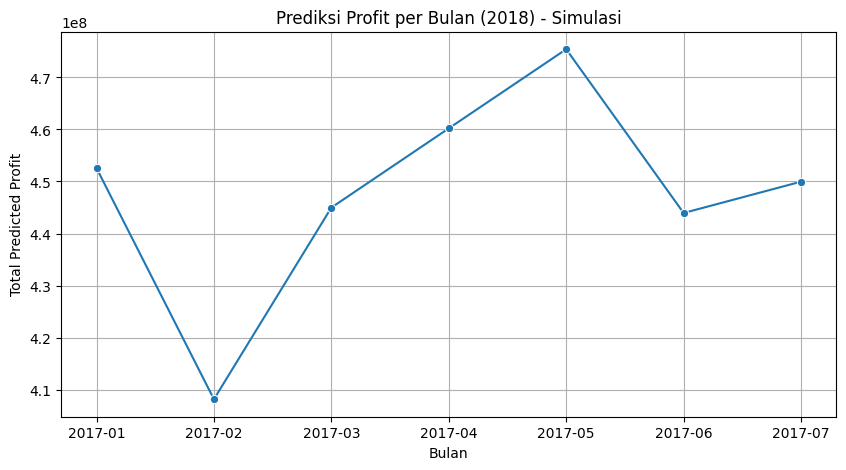

In [38]:
# Visualisasi Prediksi Profit per Bulan
import matplotlib.pyplot as plt
import seaborn as sns

profit_by_month = data_2018.groupby('Order Month')['Predicted Profit'].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=profit_by_month.index, y=profit_by_month.values, marker='o')
plt.title('Prediksi Profit per Bulan (2018) - Simulasi')
plt.xlabel('Bulan')
plt.ylabel('Total Predicted Profit')
plt.grid(True)
plt.show()


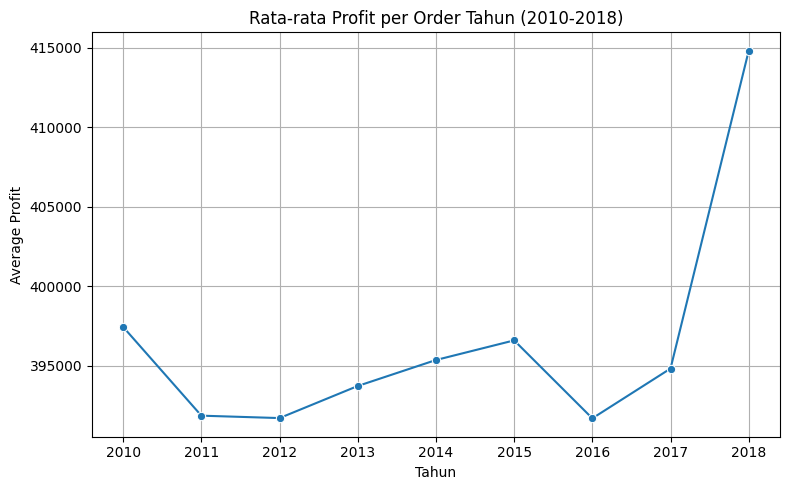

In [39]:
# Hitung rata-rata profit per tahun (2016 & 2017)
avg_profit_actual = df.groupby('Order Year')['Total Profit'].mean()

# Tambahkan prediksi untuk 2018 (dari hasil prediksi sebelumnya)
avg_profit_2018 = data_2018['Predicted Profit'].mean()

# Gabungkan ke satu dict
avg_profit_all = avg_profit_actual.to_dict()
avg_profit_all[2018] = avg_profit_2018

# Buat DataFrame untuk visualisasi
import pandas as pd
profit_trend = pd.DataFrame({
    'Year': list(avg_profit_all.keys()),
    'Average Profit': list(avg_profit_all.values())
})

# Sort by year to ensure correct line plot order
profit_trend = profit_trend.sort_values(by='Year')

# Visualisasi (menggunakan line chart)
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Average Profit', data=profit_trend, marker='o') # Use lineplot
plt.title('Rata-rata Profit per Order Tahun (2010-2018)')
plt.ylabel('Average Profit')
plt.xlabel('Tahun')
plt.grid(True)
plt.xticks(profit_trend['Year'])
plt.tight_layout()
plt.show()

In [40]:
# Hitung Total Profit per Tahun (dari data asli + prediksi 2018)
total_profit_actual = df.groupby('Order Year')['Total Profit'].sum()

# Tambahkan total profit prediksi untuk 2018
# sudah menghitung total profit prediksi di langkah sebelumnya (total_profit_2018)
total_profit_all = total_profit_actual.to_dict()
# Note : Pastikan variabel total_profit_2018 ada dari eksekusi sebelumnya
if 'total_profit_2018' in globals():
  total_profit_all[2018] = total_profit_2018
else:
  print("Peringatan: variabel total_profit_2018 tidak ditemukan. Mohon jalankan kembali cell prediksi 2018.")
  # Sebagai alternatif, hitung jumlah dari data_2018 (if any)
  if 'data_2018' in globals() and 'Predicted Profit' in data_2018.columns:
    total_profit_all[2018] = data_2018['Predicted Profit'].sum()
  else:
    total_profit_all[2018] = 0 # Atau tangani sebagai error

# Hitung Rata-rata Profit per Order per Tahun (dari data asli + prediksi 2018)
# rata-rata profit prediksi untuk 2018 (avg_profit_2018)
avg_profit_per_order_all = avg_profit_actual.to_dict()
if 'avg_profit_2018' in globals():
    avg_profit_per_order_all[2018] = avg_profit_2018
elif 'data_2018' in globals() and 'Predicted Profit' in data_2018.columns:
    avg_profit_per_order_all[2018] = data_2018['Predicted Profit'].mean()
else:
    avg_profit_per_order_all[2018] = 0 # Atau tangani sebagai error

# Create a DataFrame for the rekap with only the requested columns
rekap_profit = pd.DataFrame({
    'Total Profit': total_profit_all,
    'Rata-rata Profit per Order': avg_profit_per_order_all # Sesuaikan nama kolom
})

# Sort by year
rekap_profit = rekap_profit.sort_index()

print("Rekap Total Profit dan Rata-rata Profit per Order per Tahun (2010-2018):")
display(rekap_profit.applymap(lambda x: f'{x:,.2f}')) # Format readible

Rekap Total Profit dan Rata-rata Profit per Order per Tahun (2010-2018):


,Total Profit,Rata-rata Profit per Order
2010,"5,196,744,930.08","397,426.20"
2011,"5,181,709,653.38","391,841.32"
2012,"5,171,870,648.59","391,689.69"
2013,"5,258,788,353.60","393,710.29"
2014,"5,222,129,309.06","395,346.30"
2015,"5,226,962,290.69","396,582.87"
2016,"5,166,950,338.21","391,673.01"
2017,"2,983,968,206.00","394,809.24"
2018,"3,135,250,440.83","414,825.41"


#### Perbandingan Profit 2016–2017 (Aktual) vs 2018 (Prediksi)

In [41]:
# Hitung total profit aktual (2016 & 2017)
total_profit_actual = df.groupby('Order Year')['Total Profit'].sum()

# Gabungkan dengan prediksi 2018
profit_summary = {
    2016: total_profit_actual.get(2016, 0),
    2017: total_profit_actual.get(2017, 0),
    2018: total_profit_2018  # hasil prediksi sebelumnya
}

# Buat DataFrame
profit_df = pd.DataFrame({
    'Year': list(profit_summary.keys()),
    'Total Profit': list(profit_summary.values())
})

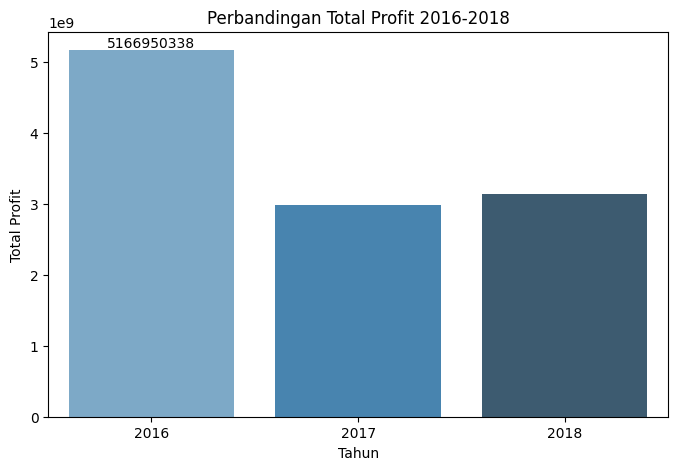

In [42]:
# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='Year', y='Total Profit', data=profit_df, palette='Blues_d')
plt.title('Perbandingan Total Profit 2016-2018')
plt.ylabel('Total Profit')
plt.xlabel('Tahun')
plt.bar_label(plt.gca().containers[0], fmt='%.0f')
plt.show()


=== Perbandingan Profit Tahun 2017 (Aktual vs Prediksi Simulasi) ===
Total Profit Aktual 2017      : 2,983,968,206.00
Total Profit Prediksi Simulasi: 3,135,250,440.83


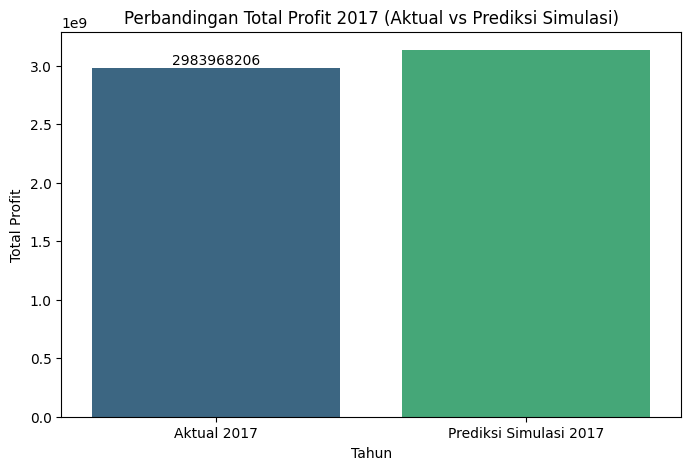

In [43]:
# Hitung total profit aktual untuk tahun 2017
actual_profit_2017 = df[df['Order Year'] == 2017]['Total Profit'].sum()

# Ambil total profit prediksi untuk tahun 2017 dari data simulasi (data_2018 berisi prediksi untuk 2018 berdasarkan data 2017)
# Catatan: data_2018 dibuat dengan menyalin data dari tahun 2017 dan mengubah tahun menjadi 2018,
# lalu prediksi dibuat pada data yang dimodifikasi ini.
# Kolom 'Predicted Profit' di data_2018 adalah prediksi berdasarkan struktur data tahun 2017 dengan perubahan simulasi.
# Jadi, untuk membandingkan dengan aktual 2017, kita perlu menggunakan jumlah dari 'Predicted Profit' dari data_2018

predicted_profit_2017_simulated = data_2018['Predicted Profit'].sum()


print("\n=== Perbandingan Profit Tahun 2017 (Aktual vs Prediksi Simulasi) ===")
print(f"Total Profit Aktual 2017      : {actual_profit_2017:,.2f}")
print(f"Total Profit Prediksi Simulasi: {predicted_profit_2017_simulated:,.2f}")

# Visualisasi Perbandingan
import matplotlib.pyplot as plt
import seaborn as sns

comparison_df = pd.DataFrame({
    'Tahun': ['Aktual 2017', 'Prediksi Simulasi 2017'],
    'Total Profit': [actual_profit_2017, predicted_profit_2017_simulated]
})

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Tahun', y='Total Profit', data=comparison_df, palette='viridis')
plt.title('Perbandingan Total Profit 2017 (Aktual vs Prediksi Simulasi)')
plt.ylabel('Total Profit')
plt.xlabel('Tahun')
plt.bar_label(ax.containers[0], fmt='%.0f')
plt.show()

### Random Forest

In [44]:
# # === Pipeline dengan Random Forest ===
# rf_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', RandomForestRegressor(n_estimators=200, random_state=42))
# ])

In [45]:
# === Pipeline dengan Random Forest (Optimized) ===
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=50,      # Kurangi jumlah pohon
        max_depth=12,          # Batasi kedalaman
        n_jobs=-1,             # Gunakan semua core CPU
        random_state=42
    ))])

In [46]:
# === Train Model ===
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Region', 'Item Type',
                                                   'Sales Channel',
                                                   'Order Priority']),
                                                 ('num', MinMaxScaler(),
                                                  ['Units Sold', 'Unit Price',
                                                   'Unit Cost'])])),
                ('model',
                 RandomForestRegressor(max_depth=12, n_estimators=50, n_jobs=-1,
                                       random_state=42))])

In [47]:
# === Prediksi Train & Test ===
y_train_pred = rf_pipeline.predict(X_train)
y_test_pred = rf_pipeline.predict(X_test)


In [48]:
# === Evaluasi ===
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)*100

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)*100

print("\n=== Evaluasi Model Random Forest ===")
print(f"TRAIN -> MAE: {mae_train:,.2f}, RMSE: {rmse_train:,.2f}, R²: {r2_train:.4f}, MAPE: {mape_train:.2f}%")
print(f"TEST  -> MAE: {mae_test:,.2f}, RMSE: {rmse_test:,.2f}, R²: {r2_test:.4f}, MAPE: {mape_test:.2f}%")


=== Evaluasi Model Random Forest ===
TRAIN -> MAE: 509.30, RMSE: 1,024.31, R²: 1.0000, MAPE: 0.52%
TEST  -> MAE: 540.60, RMSE: 1,068.55, R²: 1.0000, MAPE: 0.55%


MAPE dikatakan baik apabila kurang dari 10%

In [49]:
# === Prediksi 2018 ===
predicted_profit_2018 = rf_pipeline.predict(X_2018)
data_2018['Predicted Profit (RF)'] = predicted_profit_2018

# Tambahkan prediksi profit per unit
data_2018['Predicted Profit per Unit (RF)'] = data_2018['Predicted Profit (RF)'] / data_2018['Units Sold']

# Hitung rata-rata profit per order (setiap baris adalah satu order)
average_profit_per_order_2018_rf = data_2018['Predicted Profit (RF)'].mean()


print("\nTotal Predicted Profit 2018 (Random Forest):", f"{predicted_profit_2018.sum():,.2f}")
print("Rata-rata Predicted Profit per Unit 2018 (Random Forest):", f"{data_2018['Predicted Profit per Unit (RF)'].mean():,.2f}")
print("Rata-rata Predicted Profit per Order 2018 (Random Forest):", f"{average_profit_per_order_2018_rf:,.2f}")


Total Predicted Profit 2018 (Random Forest): 3,258,443,915.22
Rata-rata Predicted Profit per Unit 2018 (Random Forest): 86.25
Rata-rata Predicted Profit per Order 2018 (Random Forest): 431,125.15


### XGBoost Tunning

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Define preprocessor (assuming it's already defined as 'preprocessor' in a previous cell)
# If not, you would need to define it here or ensure the cell where it's defined runs before this one.
# Example preprocessor definition (if needed):
# categorical_cols = ['Region', 'Item Type', 'Sales Channel', 'Order Priority']
# numeric_cols = ['Units Sold', 'Unit Price', 'Unit Cost']
# preprocessor = ColumnTransformer(transformers=[
#     ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
#     ('num', MinMaxScaler(), numeric_cols)
# ])


# Create the xgb_pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42, verbosity=0)) # Added verbosity=0 to reduce output during search
])


# Definisikan ruang hyperparameter
param_dist = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7, 10],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV
xgb_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist,
    n_iter=10,                 # Jumlah kombinasi yang diuji
    scoring='neg_root_mean_squared_error',  # Atau 'r2', dll.
    cv=2,                      # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

#jika terlalu berat bisa ubah 20 ke 10 dan 3 ke 2
#artinya 3 folds x 20 kandidat = 60 training proses XGBoost

In [51]:
# Latih model
xgb_search.fit(X_train, y_train)

# Evaluasi hasil terbaik
best_xgb_model = xgb_search.best_estimator_

# Simpan hasil evaluasi
evaluate_model("XGBoost (Tuned)", best_xgb_model, X_test, y_test, results)

# Tampilkan hasil tuning terbaik
print("Best parameters:")
print(xgb_search.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters:
{'model__subsample': 1.0, 'model__n_estimators': 200, 'model__max_depth': 7, 'model__learning_rate': 0.2, 'model__colsample_bytree': 0.8}


In [52]:
# Tampilkan semua hasil evaluasi dalam DataFrame
results_df = pd.DataFrame(results)

# Format agar MAPE ditampilkan dalam persen
results_df.style.format({'MAPE': '{:.2f}%'})


,Model,MAE,RMSE,R2,MAPE
0,Ridge Final (alpha=1.0),107443.982125,151200.579198,0.839201,1574.58%
1,Lasso Final (alpha=10.0),107443.532398,151199.732855,0.839203,1574.24%
2,XGBoost (Tuned),1161.235504,1707.560167,0.999979,3.94%


In [53]:
# Urutkan berdasarkan RMSE terkecil
results_df.sort_values(by='RMSE', ascending=True)


,Model,MAE,RMSE,R2,MAPE
2,XGBoost (Tuned),1161.24,1707.56,1.00,3.94
1,Lasso Final (alpha=10.0),107443.53,151199.73,0.84,1574.24
0,Ridge Final (alpha=1.0),107443.98,151200.58,0.84,1574.58


#### Xgboost Manual Tunning

In [54]:
# === Pipeline dengan XGBoost ===
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42))
])

In [55]:
# Train Model
xgb_pipeline.fit(X_train, y_train)

# Prediksi Train & Test
y_train_pred = xgb_pipeline.predict(X_train)
y_test_pred = xgb_pipeline.predict(X_test)

In [56]:
# Evaluasi
mae_train_xgb = mean_absolute_error(y_train, y_train_pred)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train_xgb = r2_score(y_train, y_train_pred)
mape_train_xgb = mean_absolute_percentage_error(y_train, y_train_pred)


mae_test_xgb = mean_absolute_error(y_test, y_test_pred)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test_xgb = r2_score(y_test, y_test_pred)
mape_test_xgb = mean_absolute_percentage_error(y_test, y_test_pred)


print("\n=== Evaluasi Model XGBoost ===")
print(f"TRAIN -> MAE: {mae_train_xgb:,.2f}, RMSE: {rmse_train_xgb:,.2f}, R²: {r2_train_xgb:.4f}, MAPE: {mape_train_xgb*100:.2f}%")
print(f"TEST  -> MAE: {mae_test_xgb:,.2f}, RMSE: {rmse_test_xgb:,.2f}, R²: {r2_test_xgb:.4f}, MAPE: {mape_test_xgb*100:.2f}%")


=== Evaluasi Model XGBoost ===
TRAIN -> MAE: 1,237.52, RMSE: 1,672.29, R²: 1.0000, MAPE: 1.62%
TEST  -> MAE: 1,264.72, RMSE: 1,720.18, R²: 1.0000, MAPE: 1.81%


In [57]:
# === Prediksi 2018 ===
predicted_profit_2018 = xgb_pipeline.predict(X_2018)
data_2018['Predicted Profit (XGB)'] = predicted_profit_2018

# Hitung rata-rata profit per order (setiap baris adalah satu order)
average_profit_per_order_2018_xgb = data_2018['Predicted Profit (XGB)'].mean()


print("\nTotal Predicted Profit 2018 (XGBoost):", f"{predicted_profit_2018.sum():,.2f}")
print("Rata-rata Predicted Profit per Order 2018 (XGBoost):", f"{average_profit_per_order_2018_xgb:,.2f}")


Total Predicted Profit 2018 (XGBoost): 3,292,220,160.00
Rata-rata Predicted Profit per Order 2018 (XGBoost): 435,594.09


### Gradient Boosting

# NOTE : Semua hasil sama (berarti ada yang salah dan harus dicek ulang)**bold text**